# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1,0,1,0,0,0,0,0,0,
1,b,1,3,3,6,0,1,1,0,316,...,1,0,1,0,0,0,0,0,0,
2,b,1,4,1,6,0,0,0,0,19,...,1,0,1,0,0,0,0,0,0,
3,b,1,3,4,6,0,1,0,1,313,...,1,0,1,0,0,0,0,0,0,
4,b,1,3,3,22,0,0,0,0,313,...,1,1,0,0,0,0,0,1,0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. What test is appropriate for this problem? Does CLT apply?
2. What are the null and alternate hypotheses?

In [5]:
# data for white and black applicants
w = data[data.race=='w']
b = data[data.race=='b']

In [6]:
# white applicants
n1 = len(w)
print('Total white applicant: ', n1)
x1 = w.call.sum()
print('Number of callbacks for white applicants: ',x1)
p1 = x1/n1
print('Percent of callbacks for white applicants: %.4f' % p1)

('Total white applicant: ', 2435)
('Number of callbacks for white applicants: ', 235.0)
Percent of callbacks for white applicants: 0.0965


In [7]:
# black applicants
n2 = len(b)
print('Total black applicant: ', n2)
x2 = b.call.sum()
print('Number of callbacks for black applicants: ',x2)
p2 = x2/n2
print('Percent of callbacks for black applicants: %.4f' % p2)

('Total black applicant: ', 2435)
('Number of callbacks for black applicants: ', 157.0)
Percent of callbacks for black applicants: 0.0645


In [8]:
print('Total all of applicants: ', len(data))

('Total all of applicants: ', 4870)


(0, 4)

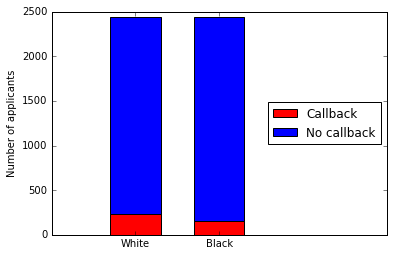

In [9]:
ind = [1,2]
f1 = plt.bar(ind,[x1,x2],width=0.6,color='red',align='center')
f2 = plt.bar(ind,[n1-x1,n2-x2],width=0.6,bottom=[x1,x2],align='center')
plt.xticks(ind,['White','Black'])
plt.ylabel('Number of applicants')
plt.legend((f1[0],f2[0]),('Callback','No callback'),loc=5)
plt.xlim([0,4])


# Answer Q1:
This problem is related to compare two population proportion (white and back applicants). The objective is to determine whether race has a significant impact on the rate of callbacks for resumes. 

The CLT can apply in this case (samples must be randomly selected). Sample size is larger than 30, so z-statistics is more suitable than t-statistics. 


# Answer Q2:
It can considered that we have two populations (black and white applicants).

Call $p_1$ and $p_2$ be percent of callbacks for white and black applicants, respectively.

So, the null hypothesis ($H_0$) is that there is no significant difference between whites and blacks (population proportion). 
 
Conversely the alternative hypothesis is that the proportion white callbacks does not equal the proportion of black callbacks.

$H_0 :  p_1 - p_2 = 0 $

$H_1 :  p_1 - p_2 \neq 0 $


In [10]:
# Your solution to Q3 here

Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

## Bootstrapping approach

In [11]:
np.random.seed(1)

# No of bootstrap sample (N)
N = 10000

# percent callbacks for white in bootstrapping
w_bs = np.empty(N)
# percent callbacks for black in bootstrapping
b_bs = np.empty(N)
# difference of percent callbacks between whites and blacks
diff_bs = np.empty(N)

In [12]:
# generate bootstraps
for i in range(N):    
    w_bs[i] = np.sum(np.random.choice(data.call,size=n1))/n1
    b_bs[i] = np.sum(np.random.choice(data.call,size=n2))/n2
    diff_bs[i] = w_bs[i] - b_bs[i]

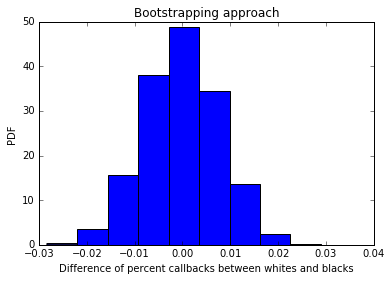

In [13]:
_ = plt.hist(diff_bs,normed=True)
plt.xlabel('Difference of percent callbacks between whites and blacks')
plt.ylabel('PDF')
plt.title('Bootstrapping approach')

In [14]:
print('alpha = 0.05')
alpha = 0.05

# Print the p-value
p_value_bs = np.sum(diff_bs >= (p1-p2))/len(diff_bs)
print('p-value = %.4f' % p_value_bs)

if p_value_bs < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')


alpha = 0.05
p-value = 0.0001
Ho can be rejected


In [15]:
ci_bs = np.percentile(diff_bs,[2.5, 97.5])
me_bs = 0.5*(ci_bs[1]-ci_bs[0])

print('The margin of error : ', me_bs)
print('Confidence interval : ', ci_bs)

('The margin of error : ', 0.015400410677618069)
('Confidence interval : ', array([-0.01560575,  0.01519507]))


## Frequentist statistical approach

In [16]:
# whites 
# total applicants (n1) and percent of callbacks (p1)
# variance (var1)
var_1 = p1*(1-p1)/n1

# blacks
# total applicants (n2) and percent of callbacks (p2)
# variance (var2)
var_2 = p2*(1-p2)/n2

# difference in callback percent 
diff_fre = p1-p2

# standard error
diff_std = np.sqrt(var_1 + var_2)

In [17]:
# use z-statistics
z_score = diff_fre/diff_std
print('z-score : ',z_score)

# p_value (2 tails)
p_value = (1-stats.norm.cdf(z_score))*2
print('p-value : ', p_value)

# significance level (alpha = 0.05)
if p_value < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

('z-score : ', 4.1155504357300003)
('p-value : ', 3.862565207524149e-05)
Ho can be rejected


In [18]:
# margin of error
# the critical Z-score values when using a 95% confidence level is 1.96
me = 1.96 * diff_std
print('The margin of error : ', me)

# confidence interval
ci = [diff_fre - me, diff_fre + me]
print('Confidence interval : ', ci)

('The margin of error : ', 0.015255406349886438)
('Confidence interval : ', [0.016777447859559147, 0.047288260559332024])


## Answer Q3:
The margin of error, confidence interval, and p-value.

In [19]:
a = {"Bootstrapping":[me_bs,ci_bs,p_value_bs],"Freqentist":[me,ci,p_value]}
pd.DataFrame(a,index=['Margin of Error','Confidence interval','p-value'])


,Bootstrapping,Freqentist
Margin of Error,0.0154004,0.0152554
Confidence interval,"[-0.0156057494867, 0.0151950718686]","[0.0167774478596, 0.0472882605593]"
p-value,0.0001,3.86257e-05


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Write a story describing the statistical significance in the context or the original problem.

Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

# Answer Q4:
With 95% confidence, both of the statistical tests from bootstrapping and frequentionist approaches are very low (< 0.05). It suggests that the null hypothesis can be rejected (there is a significant difference in the rate of callbacks for resumes between white and black applicants).

White applicants has higher acceptance rate than black ones.


# Answer Q5: 
No, it does not. Our investigation only proved that the influence of race/name on the callback success. We can not conclude this is the most important factor.

Based on our data, there could be other factors (such as education, ages, experience ...) that affect the rate of callback. To determine the most important factor in callback success, it needs to carry out a further analysis. 
